#### receptive field
3*3 -> 1 field:3
5*5 -> 1 field:5
which is better?
2 2*3 or 1 5*5
parameter: 6+9 vs 25
time: 18^2 vs 25^2 -> so always use 2 3*3 instead of 1 5*5

#### fill original's edge with 0 -> padding='SAME'(0 padding), 'VALID'
so after 3*3 size ont change

In [ ]:
# tf.keras.layers.Conv2D(
# number
# size
# step
# padding or not
# activation (if BN,not))

#### BN -> normalization
BatchNormalization()

#### pooling 
reduce features -> max/min, max not keeep background
MaxPool2D(size,strides,padding)
#### drop -> not overfitting
dropout(0.n) - > drop n% neural
####
conv->bn->activiation->pooling->fc
con is feature selection CBAPD

2022-11-01 23:12:06.463105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 23:12:10.033817: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 23:12:17.521715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-01 23:12:17.522269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

170498071/170498071 [==============================] - 26s 0us/step


2022-11-01 23:12:58.520370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-01 23:12:58.520412: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-01 23:12:58.520439: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cc-ThinkPad-T470): /proc/driver/nvidia/version does not exist
2022-11-01 23:12:58.520817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 23:12:59.314570: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 

Epoch 1/2
1562/1563 [============================>.] - ETA: 0s - loss: 1.6245 - sparse_categorical_accuracy: 0.4100

2022-11-01 23:13:41.955052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 45s 28ms/step - loss: 1.6244 - sparse_categorical_accuracy: 0.4100 - val_loss: 1.4475 - val_sparse_categorical_accuracy: 0.4931
Epoch 2/2
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3988 - sparse_categorical_accuracy: 0.4981 - val_loss: 1.3079 - val_sparse_categorical_accuracy: 0.5294
Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  456       
                                                                 
 batch_normalization (BatchN  multiple                 24        
 ormalization)                                                   
                                                                 
 activation (Activation)     multiple                  0         
                                                                 
 max_pooling2d (MaxPooling2D  mu

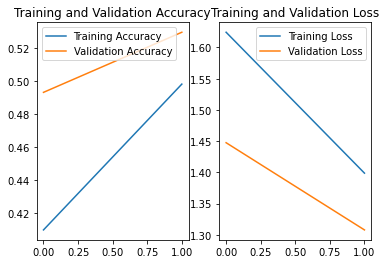

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        #CBAPD
        self.c1 = Conv2D(filters=6, 
        kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### lenet

In [ ]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

#### alexNet

In [ ]:
# 8 leayer
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')


#### VGGnet


In [ ]:
class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  # 卷积层1
        self.b1 = BatchNormalization()  # BN层1
        self.a1 = Activation('relu')  # 激活层1
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization()  # BN层1
        self.a2 = Activation('relu')  # 激活层1
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d1 = Dropout(0.2)  # dropout层

        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization()  # BN层1
        self.a3 = Activation('relu')  # 激活层1
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()  # BN层1
        self.a4 = Activation('relu')  # 激活层1
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # dropout层

        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  # BN层1
        self.a5 = Activation('relu')  # 激活层1
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  # BN层1
        self.a6 = Activation('relu')  # 激活层1
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d3 = Dropout(0.2)

        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()  # BN层1
        self.a8 = Activation('relu')  # 激活层1
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()  # BN层1
        self.a9 = Activation('relu')  # 激活层1
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)

        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization()  # BN层1
        self.a11 = Activation('relu')  # 激活层1
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()  # BN层1
        self.a12 = Activation('relu')  # 激活层1
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d5 = Dropout(0.2)

        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')

In [ ]:
#### inception
class ConvBNRelu(Model):
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        x = self.model(x, training=False) #在training=False时，BN通过整个训练集计算均值、方差去做批归一化，training=True时，通过当前batch的均值、方差去做批归一化。推理时 training=False效果好
        return x
class InceptionBlk(Model):
    def __init__(self, ch, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch
        self.strides = strides
        self.c1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_2 = ConvBNRelu(ch, kernelsz=3, strides=1)
        self.c3_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c3_2 = ConvBNRelu(ch, kernelsz=5, strides=1)
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')
        self.c4_2 = ConvBNRelu(ch, kernelsz=1, strides=strides)

In [ ]:
#### resNet jump
class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        # residual_path为True时，对输入进行下采样，即用1x1的卷积核做卷积操作，保证x能和F(x)维度相同，顺利相加
        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')